In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Data Exploration

In [2]:
train_data = pd.read_csv("train.tsv",sep='\t')
test_data = pd.read_csv("test.tsv",sep='\t')

In [6]:
# train_data.head()
# train_data.describe()
train_data.info()
# train_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150211 entries, 0 to 150210
Data columns (total 13 columns):
 #   Column                                     Non-Null Count   Dtype 
---  ------                                     --------------   ----- 
 0   Number_of_Shops_Around_ATM                 150211 non-null  int64 
 1   ATM_Zone                                   150211 non-null  object
 2   No_of_Other_ATMs_in_1_KM_radius            150211 non-null  int64 
 3   Estimated_Number_of_Houses_in_1_KM_Radius  150211 non-null  int64 
 4   ATM_Placement                              150211 non-null  object
 5   ATM_TYPE                                   150211 non-null  object
 6   ATM_Location_TYPE                          150211 non-null  object
 7   ATM_looks                                  150211 non-null  object
 8   ATM_Attached_to                            150211 non-null  object
 9   Average_Wait_Time                          150211 non-null  int64 
 10  Day_Type            

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2836 entries, 0 to 2835
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Number_of_Shops_Around_ATM                 2836 non-null   int64 
 1   ATM_Zone                                   2836 non-null   object
 2   No_of_Other_ATMs_in_1_KM_radius            2836 non-null   int64 
 3   Estimated_Number_of_Houses_in_1_KM_Radius  2836 non-null   int64 
 4   ATM_Placement                              2836 non-null   object
 5   ATM_TYPE                                   2836 non-null   object
 6   ATM_Location_TYPE                          2836 non-null   object
 7   ATM_looks                                  2836 non-null   object
 8   ATM_Attached_to                            2836 non-null   object
 9   Average_Wait_Time                          2836 non-null   int64 
 10  Day_Type                            

## Feature Type

In [8]:
train_data.select_dtypes("object")
bool_features = train_data[train_data[train_data.columns[train_data.apply(lambda x: len(x.unique())) == 2]].isin([0,1,"Y","N"])].dropna(axis=1).columns.values
bool_features

array([], dtype=object)

In [9]:
numerical_features = np.setdiff1d(train_data.select_dtypes(include=["int64","float64"]).columns.values, bool_features)
numerical_features

array(['Average_Wait_Time', 'Estimated_Number_of_Houses_in_1_KM_Radius',
       'No_of_Other_ATMs_in_1_KM_radius', 'Number_of_Shops_Around_ATM',
       'rating', 'revenue'], dtype=object)

## Plot Feature

<Axes: >

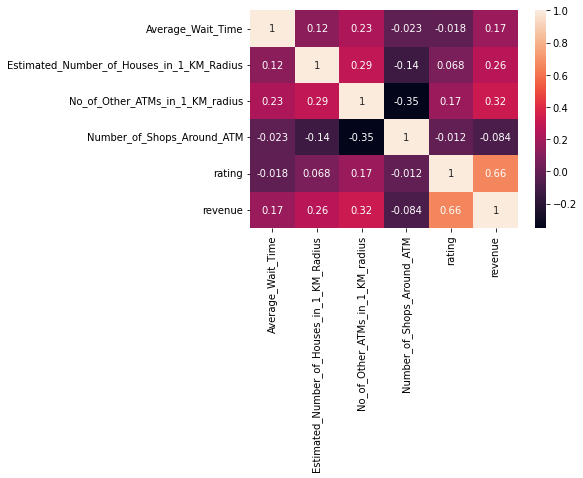

In [11]:
sns.heatmap(train_data[['Average_Wait_Time', 'Estimated_Number_of_Houses_in_1_KM_Radius',
    'No_of_Other_ATMs_in_1_KM_radius', 'Number_of_Shops_Around_ATM',
    'rating', 'revenue']].corr(), annot=True)

## Plot Target

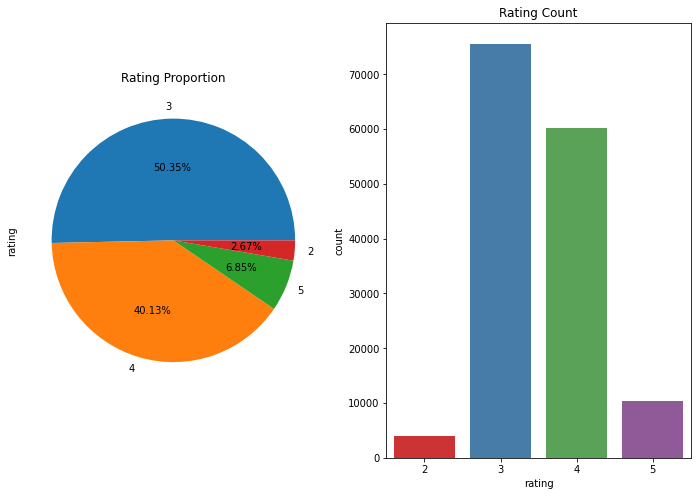

In [12]:
fig, ax = plt.subplots(1,2, figsize=(12,8))

ax[0] = train_data.rating.value_counts().plot.pie(explode=[0,0,0,0], ax=ax[0], autopct="%1.2f%%")
ax[0].set_title("Rating Proportion")

ax[1] = sns.countplot(x="rating", data = train_data, palette="Set1")
ax[1].set_title("Rating Count")

plt.show()

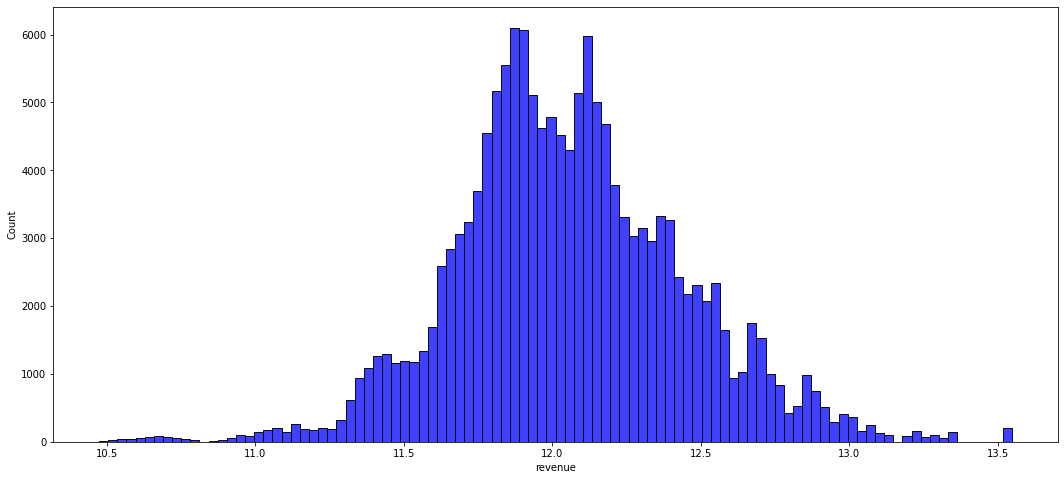

In [14]:
x = np.log(train_data.revenue)
fig, ax = plt.subplots(figsize=(18,8))
ax = sns.histplot(x, bins=100, color="b")
plt.show()

# Outlier Plot

<Axes: >

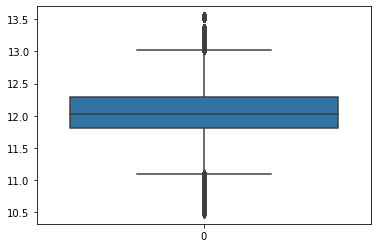

In [15]:
sns.boxplot(x)

# Data Preprocessing

## Missing Value

In [16]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent = train_data.isnull().sum()/ train_data.isnull().count().sort_values(ascending=False)
missing = pd.concat([total,percent], axis=1, keys=["Total", "Percent"])
new_data = train_data[missing[missing.Percent < 0.05].index]
new_data = new_data.dropna()
missing

,Total,Percent
Number_of_Shops_Around_ATM,0,0.0
ATM_Zone,0,0.0
No_of_Other_ATMs_in_1_KM_radius,0,0.0
Estimated_Number_of_Houses_in_1_KM_Radius,0,0.0
ATM_Placement,0,0.0
ATM_TYPE,0,0.0
ATM_Location_TYPE,0,0.0
ATM_looks,0,0.0
ATM_Attached_to,0,0.0
Average_Wait_Time,0,0.0


# Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le = LabelEncoder()
for col in new_data.select_dtypes("object").columns:
    new_data[col] = le.fit_transform(new_data[col])

new_data

,Number_of_Shops_Around_ATM,ATM_Zone,No_of_Other_ATMs_in_1_KM_radius,Estimated_Number_of_Houses_in_1_KM_Radius,ATM_Placement,ATM_TYPE,ATM_Location_TYPE,ATM_looks,ATM_Attached_to,Average_Wait_Time,Day_Type,rating,revenue
0,66,3,65,8450,0,3,2,1,0,3,3,4,209500
1,26,3,80,9600,0,3,2,1,0,3,3,3,184300
2,65,3,68,11250,0,2,2,1,0,3,3,4,231500
3,80,3,60,9550,0,2,2,1,0,3,3,4,143600
4,66,3,84,14260,0,2,2,1,0,4,3,4,255600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150206,30,3,79,9790,0,3,2,1,3,3,3,3,149500
150207,22,3,65,36500,0,2,0,0,0,4,3,3,197200
150208,123,3,40,5664,0,2,2,1,0,2,3,5,278700
150209,64,3,86,11065,0,2,2,1,0,3,3,5,282800


## Increase Dimension

In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [19]:
poly = PolynomialFeatures(
    degree=2,
    interaction_only=False,
    include_bias=True
)
poly.fit_transform(new_data).shape

(150211, 105)

# Outlier Filter

In [20]:
iso = IsolationForest(contamination=0.1)

In [21]:
ycap = iso.fit_predict(new_data.values)

In [22]:
mask = ycap != -1
new_data = new_data[mask]

In [23]:
train_data.shape,new_data.shape

((150211, 13), (135248, 13))

In [24]:
def prep(data):
    new_data = data.copy()
    total = new_data.isnull().sum().sort_values(ascending=False)
    percent = new_data.isnull().sum()/ new_data.isnull().count().sort_values(ascending=False)
    missing = pd.concat([total,percent], axis=1, keys=["Total", "Percent"])
    new_data = new_data[missing[missing.Percent<0.05].index]
    new_data = new_data.dropna()
    le = LabelEncoder()
    for col in new_data.select_dtypes("object").columns:
        new_data[col] = le.fit_transform(new_data[col])
    iso = IsolationForest(contamination=0.1)
    ycap = iso.fit_predict(new_data.values)
    mask = ycap != -1
    new_data = new_data[mask]
    return new_data

In [25]:
new_data = prep(train_data)

# Feature Selection

In [27]:
# model
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel, SequentialFeatureSelector

# estimator
## regression
from sklearn.feature_selection import f_regression, mutual_info_regression, r_regression

## classification
from sklearn.feature_selection import f_classif, mutual_info_classif, chi2

# basic modal
from sklearn.ensemble import RandomForestRegressor

Filter methods
    Basic methods
    Univariate methods
    Information gain
    Fisher score
    Correlation Matrix with Heatmap
Wrapper methods
    Forward selection
    Backward elimination
    Exhaustive feature selection
    Recursive feature elimination
    Recursive Feature Elimination
    Recursive feature elimination with cross validation
Embedded methods
    Lasso
    Ridge
    Tree Importance

# Filter

1. Basic methods
2. Univariate feature selection
3. Information gain
set of all features -> select the best subset of features -> learn Algorithm -> Performance

## Basic methods

### Remove constant values

In [28]:
from sklearn.feature_selection import VarianceThreshold

filter = VarianceThreshold(threshold=0)
filter.fit_transform(new_data)

array([[    66,      3,     65, ...,      3,      4, 209500],
       [    26,      3,     80, ...,      3,      3, 184300],
       [    65,      3,     68, ...,      3,      4, 231500],
       ...,
       [   123,      3,     40, ...,      3,      5, 278700],
       [    64,      3,     86, ...,      3,      5, 282800],
       [    89,      3,     76, ...,      3,      3, 184600]])

### Remove quasi-constant features Quasi-constant features are those features that have the same value for the large part of the observations in the dataset. They do not vary much within the dataset and hence, they do not have much information. They will not contribute much to the prediction task. We can remove these features as they do not have much predictive power.

In [29]:
filter = VarianceThreshold(threshold=0.01)
filter.fit_transform(new_data)

array([[    66,      3,     65, ...,      3,      4, 209500],
       [    26,      3,     80, ...,      3,      3, 184300],
       [    65,      3,     68, ...,      3,      4, 231500],
       ...,
       [   123,      3,     40, ...,      3,      5, 278700],
       [    64,      3,     86, ...,      3,      5, 282800],
       [    89,      3,     76, ...,      3,      3, 184600]])

In [31]:
new_data = new_data[new_data.columns[filter.get_support()]]

In [33]:
y_clf_train = new_data["rating"]
y_reg_train = new_data["revenue"]
X_clf_train = new_data.drop("rating",axis=1)
X_reg_train = new_data.drop("revenue",axis=1)

In [34]:
selector = SelectKBest(f_regression, k=10)
selector.fit(X_reg_train, y_reg_train)

SelectKBest(score_func=<function f_regression at 0x180d13370>)

In [35]:
X_reg_train[X_reg_train.columns[selector.get_support()]]

,Number_of_Shops_Around_ATM,ATM_Zone,No_of_Other_ATMs_in_1_KM_radius,Estimated_Number_of_Houses_in_1_KM_Radius,ATM_TYPE,ATM_Location_TYPE,ATM_Attached_to,Average_Wait_Time,Day_Type,rating
0,66,3,65,8450,3,2,0,3,3,4
1,26,3,80,9600,3,2,0,3,3,3
2,65,3,68,11250,2,2,0,3,3,4
3,80,3,60,9550,2,2,0,3,3,4
4,66,3,84,14260,2,2,0,4,3,4
...,...,...,...,...,...,...,...,...,...,...
150205,51,4,50,6000,3,2,0,4,3,3
150206,30,3,79,9790,3,2,3,3,3,3
150208,123,3,40,5664,2,2,0,2,3,5
150209,64,3,86,11065,2,2,0,3,3,5
